Testing Randomness of Data,Normality of Data and Performing Variance Test

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import os
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('D:/DCU/CA660_Stats/Assignment1/Amsterdam_Netherlands/Intermediate/Merged_Clean.csv')

In [3]:
df.head(5)

,id,host_id,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,...,instant_bookable,reviews_per_month,date,available,price_y,adjusted_price,minimum_nights_y,maximum_nights_y,Mean_Sent_Pol,Total_Review_By_Listing
0,2818,3159,within an hour,1.0,t,1.0,t,t,"Amsterdam, North Holland, Netherlands",Oostelijk Havengebied - Indische Buurt,...,t,2.83,2021-11-04,f,59.0,59.0,3,1125,0.383577,239
1,2818,3159,within an hour,1.0,t,1.0,t,t,"Amsterdam, North Holland, Netherlands",Oostelijk Havengebied - Indische Buurt,...,t,2.83,2021-12-02,f,69.0,69.0,3,1125,0.383577,239
2,2818,3159,within an hour,1.0,t,1.0,t,t,"Amsterdam, North Holland, Netherlands",Oostelijk Havengebied - Indische Buurt,...,t,2.83,2021-12-28,f,61.0,61.0,3,1125,0.383577,239
3,2818,3159,within an hour,1.0,t,1.0,t,t,"Amsterdam, North Holland, Netherlands",Oostelijk Havengebied - Indische Buurt,...,t,2.83,2021-12-30,f,65.0,65.0,3,1125,0.383577,239
4,2818,3159,within an hour,1.0,t,1.0,t,t,"Amsterdam, North Holland, Netherlands",Oostelijk Havengebied - Indische Buurt,...,t,2.83,2021-12-31,f,63.0,63.0,3,1125,0.383577,239


In [4]:
df.isnull().sum()

id                                0
host_id                           0
host_response_time             6324
host_response_rate             6324
host_is_superhost                 0
host_listings_count              15
host_has_profile_pic              0
host_identity_verified            0
neighbourhood                     0
neighbourhood_cleansed            0
latitude                          0
longitude                         0
property_type                     0
room_type                         0
accommodates                      0
bathrooms_text                   93
bedrooms                       1869
beds                            707
amenities                         0
price_x                           0
minimum_nights_x                  0
maximum_nights_x                  0
has_availability                  0
availability_30                   0
availability_60                   0
availability_90                   0
availability_365                  0
number_of_reviews           

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29842 entries, 0 to 29841
Data columns (total 47 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           29842 non-null  int64  
 1   host_id                      29842 non-null  int64  
 2   host_response_time           23518 non-null  object 
 3   host_response_rate           23518 non-null  float64
 4   host_is_superhost            29842 non-null  object 
 5   host_listings_count          29827 non-null  float64
 6   host_has_profile_pic         29842 non-null  object 
 7   host_identity_verified       29842 non-null  object 
 8   neighbourhood                29842 non-null  object 
 9   neighbourhood_cleansed       29842 non-null  object 
 10  latitude                     29842 non-null  float64
 11  longitude                    29842 non-null  float64
 12  property_type                29842 non-null  object 
 13  room_type       

In [6]:
df['reviews_per_month'].head(10)

0    2.83
1    2.83
2    2.83
3    2.83
4    2.83
5    2.83
6    2.83
7    2.83
8    2.83
9    2.83
Name: reviews_per_month, dtype: float64

In [7]:
df['reviews_per_month'].mean()

1.8689012130554266

In [8]:
df=df.dropna()

In [9]:
df.isnull().sum()

id                             0
host_id                        0
host_response_time             0
host_response_rate             0
host_is_superhost              0
host_listings_count            0
host_has_profile_pic           0
host_identity_verified         0
neighbourhood                  0
neighbourhood_cleansed         0
latitude                       0
longitude                      0
property_type                  0
room_type                      0
accommodates                   0
bathrooms_text                 0
bedrooms                       0
beds                           0
amenities                      0
price_x                        0
minimum_nights_x               0
maximum_nights_x               0
has_availability               0
availability_30                0
availability_60                0
availability_90                0
availability_365               0
number_of_reviews              0
number_of_reviews_ltm          0
number_of_reviews_l30d         0
review_sco

In [11]:
df['price_x'].describe()

count    21562.000000
mean       153.703599
std         88.322812
min          9.000000
25%         95.000000
50%        136.000000
75%        187.000000
max       1399.000000
Name: price_x, dtype: float64

In [12]:
Q1 = df['price_x'].quantile(0.25)
Q3 = df['price_x'].quantile(0.75)
IQR=Q3-Q1
df = df[~((df['price_x']<(Q1-1.5*IQR))|(df['price_x']>(Q3+1.5-IQR)))]

Testing Distribution of Price using Shapiro Test

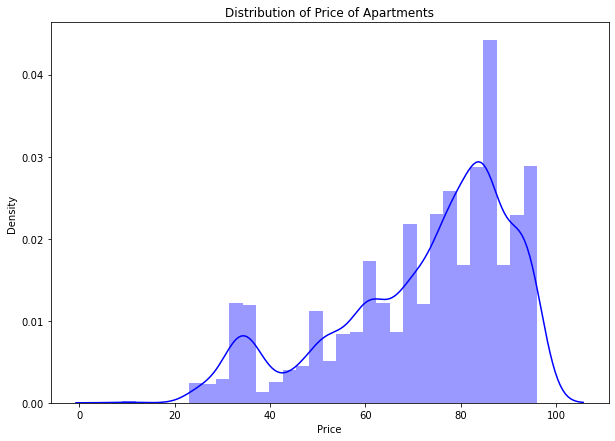

In [14]:
plt.figure(figsize=(10,7))
sns.distplot(df.price_x,color='b')
plt.xlabel("Price")
plt.title("Distribution of Price of Apartments")
plt.show()

Ho = Distribution is normal
Ha= Distribution of price is not normal

Using Shapiro test provided by scipy library

In [15]:
import scipy.stats as st
st.shapiro(df.price_x)

ShapiroResult(statistic=0.9145455360412598, pvalue=0.0)

Our test value is 0.914 which is greater than p-value, So we need to reject the hypothesis. In our merged dataset of listing,calendar and reviews, the distribution is not normal

Since we are testing variance on we are using Levene, test we will test below hypothesis:

Ho (null hypothesis): The variance of all room types (private, shared_room,hotel and entire_home are equal
Ha (alternate hypothesis): The variance of all room types (private, shared_room,hotel and entire_home are equal

In [21]:
pvt = df[df['room_type'] == 'Private room']
share = df[df['room_type'] == 'Shared room']
apt = df[df['room_type'] == 'Entire home/apt']
htl = df[df['room_type'] == 'Hotel room']

In [22]:
import scipy.stats as st
st.levene(pvt.price_x, share.price_x, apt.price_x,htl.price_x)

LeveneResult(statistic=130.48236914308492, pvalue=1.0390251795226972e-81)

Since the p value is less than  alpha =5%, we will reject this hypothesis. So, we can conclude that the rooom types have different variances.

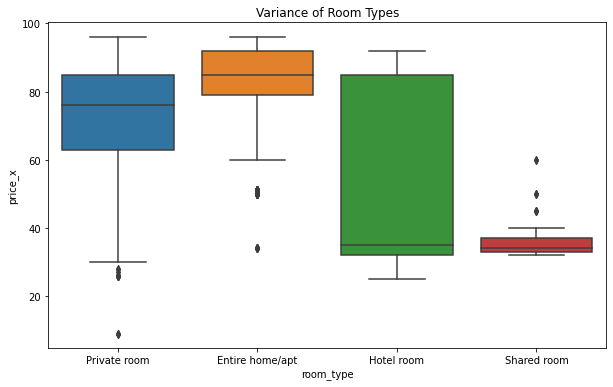

In [43]:
plt.figure(figsize=(10,6))
plt.title("Variance of Room Types")
sns.boxplot(y='price_x',x='room_type',data=df)
plt.show()

Perfoming One Anova Test to determine dependency of price of listing on neighbourhood as neighbourhood is a categorical value and has more than one categories

In [28]:
df['neighbourhood_cleansed'].unique()

array(['Oostelijk Havengebied - Indische Buurt', 'Centrum-West',
       'Centrum-Oost', 'Slotervaart', 'De Baarsjes - Oud-West',
       'Westerpark', 'Zuid', 'Noord-Oost', 'Oud-Noord',
       'De Pijp - Rivierenbuurt', 'Geuzenveld - Slotermeer', 'Oud-Oost',
       'Noord-West', 'Buitenveldert - Zuidas', 'Osdorp',
       'Bijlmer-Centrum', 'Gaasperdam - Driemond',
       'De Aker - Nieuw Sloten', 'Bos en Lommer', 'Watergraafsmeer',
       'IJburg - Zeeburgereiland', 'Bijlmer-Oost'], dtype=object)

In [35]:
a= df[df['neighbourhood_cleansed'] == 'Oostelijk Havengebied - Indische Buurt']['price_x']
b= df[df['neighbourhood_cleansed'] == 'Centrum-West']['price_x']
c= df[df['neighbourhood_cleansed'] == 'Slotervaart']['price_x']
d = df[df['neighbourhood_cleansed'] == 'Centrum-Oost']['price_x']
e = df[df['neighbourhood_cleansed'] == 'De Baarsjes - Oud-West']['price_x']
f = df[df['neighbourhood_cleansed'] == 'Westerpark']['price_x']
g = df[df['neighbourhood_cleansed'] == 'Zuid']['price_x']
h = df[df['neighbourhood_cleansed'] == 'Noord-Oost']['price_x']
i = df[df['neighbourhood_cleansed'] == 'Oud-Noord']['price_x']
j = df[df['neighbourhood_cleansed'] == 'De Pijp - Rivierenbuurt']['price_x']
k = df[df['neighbourhood_cleansed'] == 'Geuzenveld - Slotermeer']['price_x']
l = df[df['neighbourhood_cleansed'] == 'Oud-Oost']['price_x']
m = df[df['neighbourhood_cleansed'] == 'Osdorp']['price_x']
n = df[df['neighbourhood_cleansed'] == 'Buitenveldert - Zuidas']['price_x']
o = df[df['neighbourhood_cleansed'] == 'Noord-West']['price_x']
p = df[df['neighbourhood_cleansed'] == 'Bijlmer-Centrum']['price_x']
q = df[df['neighbourhood_cleansed'] == 'Gaasperdam - Driemond']['price_x']
r = df[df['neighbourhood_cleansed'] == 'Bos en Lommer']['price_x']
s = df[df['neighbourhood_cleansed'] == 'De Aker - Nieuw Sloten']['price_x']
t = df[df['neighbourhood_cleansed'] == 'Watergraafsmeer']['price_x']
u = df[df['neighbourhood_cleansed'] == 'IJburg - Zeeburgereiland']['price_x']
v = df[df['neighbourhood_cleansed'] == 'Bijlmer-Oost']['price_x']

Ho= Mean Price is same for all Neighbourhoods
Ha= Mean Price is not same for all Neighbourhoods

In [37]:
st.f_oneway(a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v)

F_onewayResult(statistic=61.19193872087742, pvalue=3.959271066038013e-232)

As p-value is less than 0.05(alpha vale), we need to go with alternate hypothesis that mean prices of listings are not same across neighbourhoods of Amsterdam

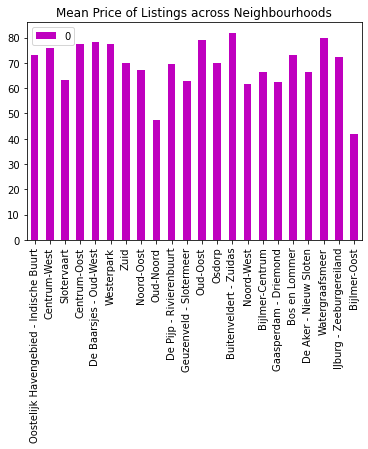

In [44]:
neighbour = ['Oostelijk Havengebied - Indische Buurt','Centrum-West','Slotervaart','Centrum-Oost','De Baarsjes - Oud-West','Westerpark','Zuid','Noord-Oost','Oud-Noord','De Pijp - Rivierenbuurt','Geuzenveld - Slotermeer','Oud-Oost','Osdorp','Buitenveldert - Zuidas','Noord-West','Bijlmer-Centrum','Gaasperdam - Driemond','Bos en Lommer','De Aker - Nieuw Sloten','Watergraafsmeer','IJburg - Zeeburgereiland','Bijlmer-Oost']
x = pd.DataFrame([a.mean(),b.mean(),c.mean(),d.mean(),e.mean(),f.mean(),g.mean(),h.mean(),i.mean(),j.mean(),k.mean(),l.mean(),m.mean(),n.mean(),o.mean(),p.mean(),q.mean(),r.mean(),s.mean(),t.mean(),u.mean(),v.mean()], index=neighbour)
x.plot.bar(color='m')
plt.title("Mean Price of Listings across Neighbourhoods")
plt.show()

We are testing Relation Between Room Type and Neighbourhood
Since both are categorical variables having more than 2 categories, we will use Chi-Square Test

Ho (null hypothesis): There is no relation between Room Type and Neighbourhood Group.

Ha (alternate hypothesis): There is an relation between Room Type and Neighbourhood Group

In [50]:
tab = pd.crosstab(df['room_type'],df['neighbourhood_cleansed'])

In [51]:
st.chi2_contingency(tab)

(3483.3534362203263,
 0.0,
 63,
 array([[7.67806268e+00, 1.91951567e+00, 3.57029915e+01, 8.25391738e+00,
         9.57838319e+01, 2.25543091e+02, 1.47802707e+01, 1.73140313e+02,
         8.56103989e+01, 1.07492877e+01, 1.76595442e+01, 9.98148148e+00,
         1.61239316e+01, 5.04832621e+01, 4.28051994e+01, 1.24768519e+01,
         5.72015670e+01, 5.62418091e+01, 2.09227208e+01, 1.42044160e+01,
         4.14615385e+01, 7.92759972e+01],
        [2.77777778e+00, 6.94444444e-01, 1.29166667e+01, 2.98611111e+00,
         3.46527778e+01, 8.15972222e+01, 5.34722222e+00, 6.26388889e+01,
         3.09722222e+01, 3.88888889e+00, 6.38888889e+00, 3.61111111e+00,
         5.83333333e+00, 1.82638889e+01, 1.54861111e+01, 4.51388889e+00,
         2.06944444e+01, 2.03472222e+01, 7.56944444e+00, 5.13888889e+00,
         1.50000000e+01, 2.86805556e+01],
        [2.84330484e+01, 7.10826211e+00, 1.32213675e+02, 3.05655271e+01,
         3.54702279e+02, 8.35220798e+02, 5.47336182e+01, 6.41165242e+02,
        

Since p-value(0.0) is less than test value, we will reject the NULL hypothesis. There is a relation between neighbourhood and the room type available 

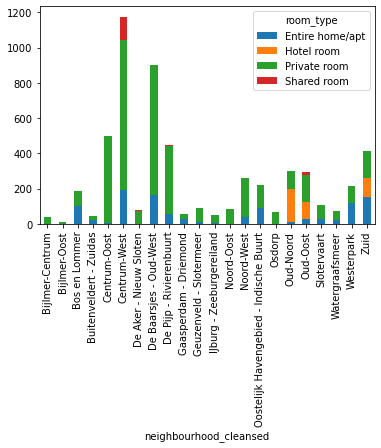

In [55]:
ct = pd.crosstab(df['neighbourhood_cleansed'],df['room_type'])
ct.plot.bar(stacked=True)
plt.show()